# Exploratory Data Analysis

### Importing Libraries

Importing general libraries for working with the data and graphs: numpy, pandas, matplotlib, seaborn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I am working with 10k data only for now and not the whole data. Previously I loaded the raw data, converted it into a dataframe and saved it inside data.csv, I will be using "data.csv" for analysing the data.

In [3]:
# Loading the data

df = pd.read_csv('C:/Users/umar/Documents/Machine Learning/Recommender System/Data Analysis/data.csv', index_col=0)
df.shape

(39967, 4)

In [4]:
df.head()

,Cust_Id,Movie_Id,Rating,Date
0,1488844,1,3.0,2005-09-06
1,822109,1,5.0,2005-05-13
2,885013,1,4.0,2005-10-19
3,30878,1,4.0,2005-12-26
4,823519,1,3.0,2004-05-03


In [5]:
# Loading movie_titles

df_title = pd.read_csv('C:/Users/umar/Documents/Machine Learning/Recommender System/Data/movie_titles.csv', header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.head(10)

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


### Data Analysis

In [6]:
# Finding missing values if any 

features_with_na = [i for i in df.columns if df[i].isnull().sum()>1]
len(features_with_na)

0

Conclusion: I do not have any missing value in my data.

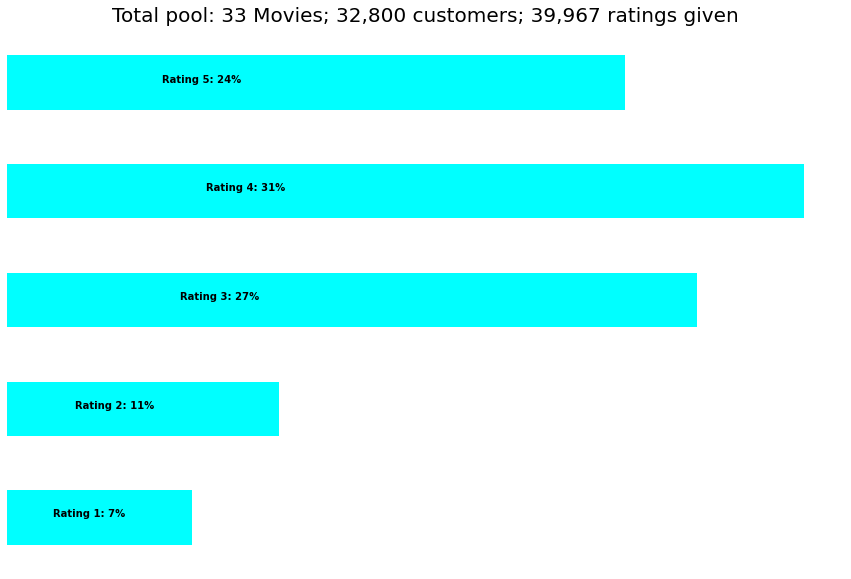

In [7]:
# Checking out the data spread

p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df['Movie_Id'].nunique()

# get customer count
cust_count = df['Cust_Id'].nunique()

# get rating count
rating_count = df['Cust_Id'].count()

# Horizontal Bar plot
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10), color = 'aqua')
plt.title('Total pool: {:,} Movies; {:,} customers; {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

# Writing inside bar graph
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'black', weight = 'bold')

Conclusion: We can see that the rating tends to be relatively positive (>=3). This may be due to the fact that unhappy customers tend to just leave instead of making efforts to rate.

In [18]:
# Finding the movies with highest number of 5 ratings

movies = df['Movie_Id'].unique()
rating_five = {}
for i in movies:
    rating_five[i]=0
for index,row in df.iterrows():
    if(row['Rating']==5):
        rating_five[row['Movie_Id']]+=1;

sorted_rating_five = {}
sorted_keys = sorted(rating_five, key=rating_five.get, reverse=True)
for i in sorted_keys:
    sorted_rating_five[i]=rating_five[i]
print(sorted_rating_five)

{4506: 2129, 9217: 1695, 8: 968, 13378: 797, 13370: 757, 5: 504, 13375: 458, 3: 357, 9212: 356, 13377: 338, 13374: 212, 4503: 188, 6: 153, 1: 145, 13368: 121, 9215: 71, 4501: 48, 2: 41, 13373: 38, 4500: 36, 13369: 36, 9216: 34, 4504: 27, 9214: 23, 13372: 20, 4: 19, 9213: 19, 13376: 14, 9211: 13, 13371: 9, 4505: 6, 4502: 5, 7: 3}


We can see, Movie with Id=4506 is the movie with the most 5 ratings and Movie with Id=7 is the movie with the least 5 ratings.

Text(0.5, 1.0, 'Movie with the most number of 5 Rating')

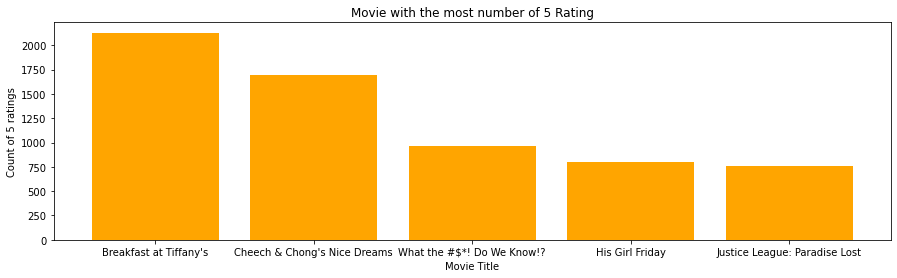

In [36]:
# Plotting these movies

x=[]
k=0;
for i in sorted_rating_five:
    if(k==5):
        break
    k+=1
    x.append(df_title['Name'][i-1])  # (i-1) because the index starts from 0
y=[]
k=0;
for i in sorted_rating_five:
    if(k==5):
        break
    k+=1
    y.append(sorted_rating_five[i])
f=plt.figure()
f.set_figwidth(15)
plt.bar(x, y, color = 'orange')
plt.xlabel('Movie Title')
plt.ylabel('Count of 5 ratings')
plt.title('Movie with the most number of 5 Rating')


Conclusion: Breakfast at Tiffany's is the most liked movie amongst all the users(rating-wise).